In [5]:
import sys
import glob

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sys.path.append("../")

from tools.amber import process_amber, process_multiple_amber_outputs

### Check single results from one csv

In [8]:
amber_results = process_amber.ProcessAmber(
    input_csv="files/amber_csvs/atp_mn.csv",
    sim_length=30,
    number_of_reps=10,
    trajectory_dump_frequency=5000,
    timestep=0.002,
)
amber_results.read_dataframe()

,#Frame,radius,distplot,rmsf,ligand_rmsd,C,CA,O,N,SASA
0,1,21.4732,0.0000,330.8972,1.7097,1.4017,1.4313,1.5536,1.3755,145.6393
1,2,21.4191,0.7265,66.3047,1.6900,1.3780,1.4116,1.5181,1.3639,152.0677
2,3,21.4207,0.7633,27.6175,1.7743,1.5056,1.5444,1.6285,1.4965,161.2295
3,4,21.5715,0.8172,38.6584,1.8000,1.3429,1.3687,1.4990,1.3266,146.5575
4,5,21.4218,0.8304,45.3229,1.7466,1.3305,1.3484,1.4692,1.3184,139.8167
...,...,...,...,...,...,...,...,...,...,...
30005,30006,21.2190,2.2328,0.0000,2.1806,1.9962,2.0446,2.1477,1.9726,150.6705
30006,30007,21.1925,2.1575,0.0000,2.2171,1.8676,1.9221,2.0189,1.8526,155.4705
30007,30008,21.1893,2.1540,0.0000,2.3921,1.8928,1.9378,2.0146,1.8838,152.6661
30008,30009,21.1325,2.1669,0.0000,2.1850,1.8343,1.8806,1.9925,1.8090,155.0024


In [9]:
amber_results.obtain_statistics_from_df()

,mean,std
radius,21.575684,0.183167
distplot,1.963703,0.241708
rmsf,0.717253,10.976248
ligand_rmsd,1.985644,0.337275
C,1.934988,0.294988
CA,1.978174,0.297122
O,2.047352,0.286170
N,1.930214,0.297144
SASA,167.190001,25.324562


### Peform full-data analysis

In [3]:
all_amber = process_multiple_amber_outputs.ProcessMultipleAmberOutputs(
    input_csvs = glob.glob('./files/amber_csvs/*.csv'),
    sim_length=30,
    number_of_reps=10,
    trajectory_dump_frequency=5000,
    timestep=0.002,
)

all_amber.read_dataframe()

,#Frame,radius,distplot,rmsf,ligand_rmsd,C,CA,O,N,SASA,structure
0,1,21.4086,0.0000,355.5379,1.2913,2.2905,2.3118,2.4154,2.2495,137.7467,ctp_mn.csv
1,2,21.4251,0.7977,71.9747,1.2855,2.2374,2.2699,2.3566,2.2094,119.5072,ctp_mn.csv
2,3,21.4543,0.8683,30.2231,1.2828,2.2427,2.2805,2.3519,2.2251,125.4340,ctp_mn.csv
3,4,21.3290,0.9109,35.6569,1.3019,2.2231,2.2464,2.3559,2.1852,123.8665,ctp_mn.csv
4,5,21.3985,0.9314,50.3025,1.3887,2.2443,2.2694,2.3684,2.2094,122.4679,ctp_mn.csv
...,...,...,...,...,...,...,...,...,...,...,...
120035,30006,21.8190,1.7753,0.0000,1.4507,2.6469,2.6856,2.7080,2.6544,189.2608,gtp_mn.csv
120036,30007,21.8341,1.8365,0.0000,1.3246,2.7024,2.7385,2.7632,2.7075,184.1316,gtp_mn.csv
120037,30008,21.7191,1.8790,0.0000,1.4053,2.5539,2.5954,2.6118,2.5595,187.1234,gtp_mn.csv
120038,30009,21.8225,1.8989,0.0000,1.4272,2.7392,2.7775,2.8189,2.7316,187.4921,gtp_mn.csv


Make plots to see how did the calculations go

'Done!'

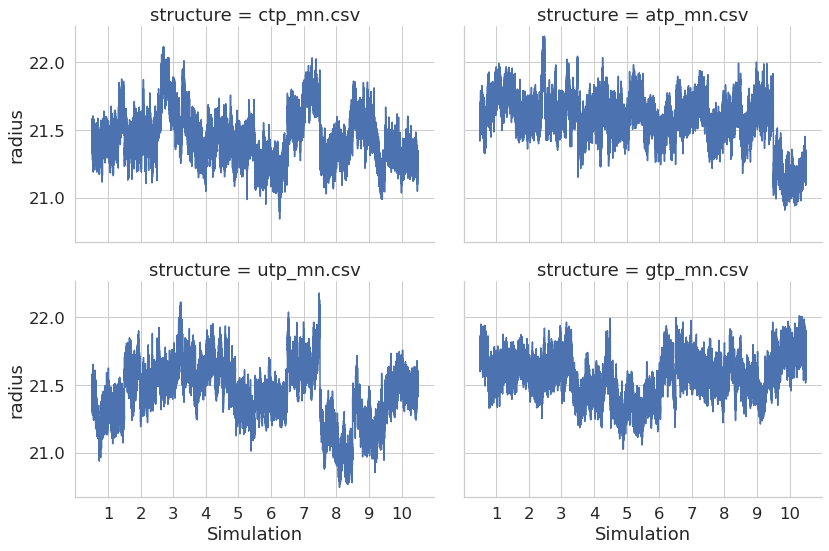

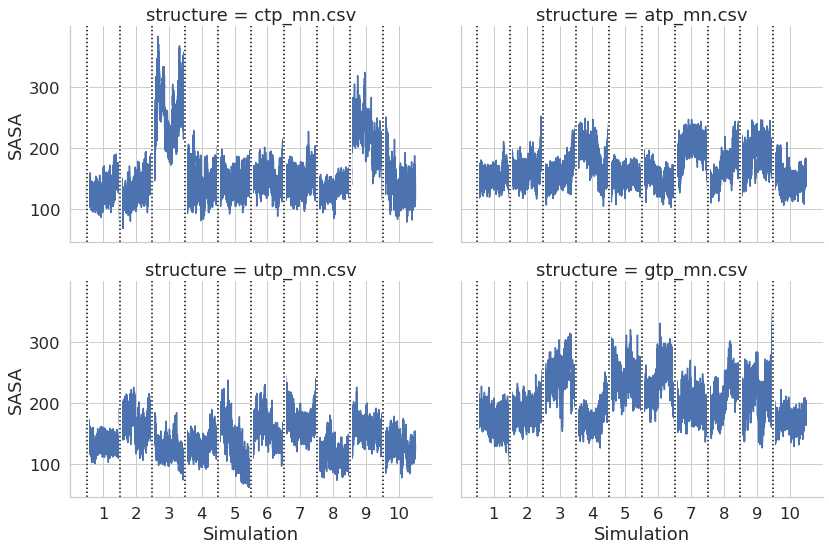

In [10]:
all_amber.plot_feature('radius', png=False)
all_amber.plot_feature('SASA', png=False, vertical_lines=True)

In [12]:
all_amber.analyze_feature('SASA')

KeyError: 'Column not found: SASA'